<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Cat_Vs_Dog_Image_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 25.4MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.4533 - accuracy: 0.5609 - val_loss: 0.6726 - val_accuracy: 0.5602
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6471 - accuracy: 0.6215 - val_loss: 0.6830 - val_accuracy: 0.6646
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6177 - accuracy: 0.6694 - val_loss: 0.6097 - val_accuracy: 0.6912
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5738 - accuracy: 0.6983 - val_loss: 0.5804 - val_accuracy: 0.6838
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5127 - accuracy: 0.7392 - val_loss: 0.5527 - val_accuracy: 0.7434
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4743 - accuracy: 0.7631 - val_loss: 0.4511 - val_accuracy: 0.7822
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4067 - accuracy: 0.7947 - val_loss: 0.4492 - val_ac

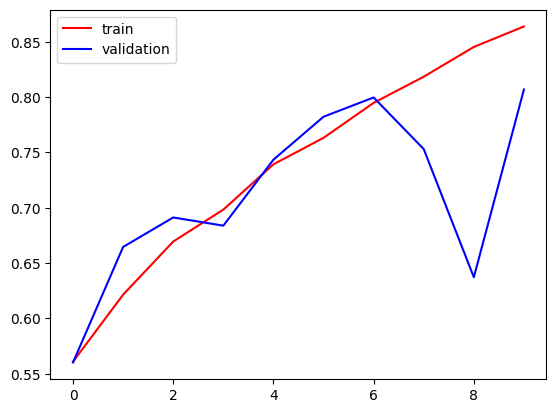

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

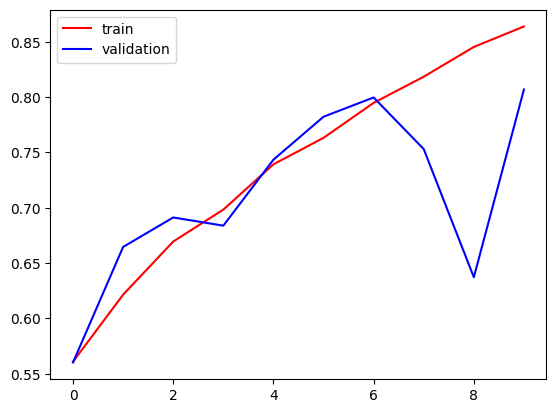

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

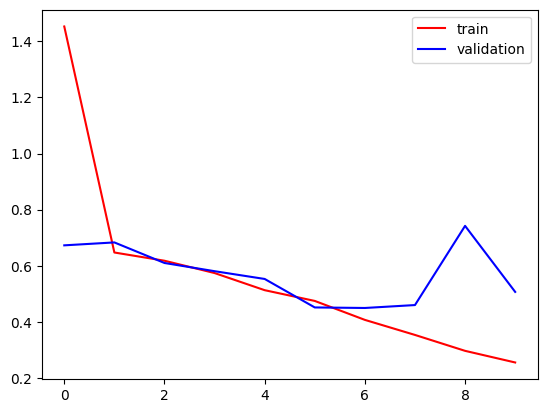

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

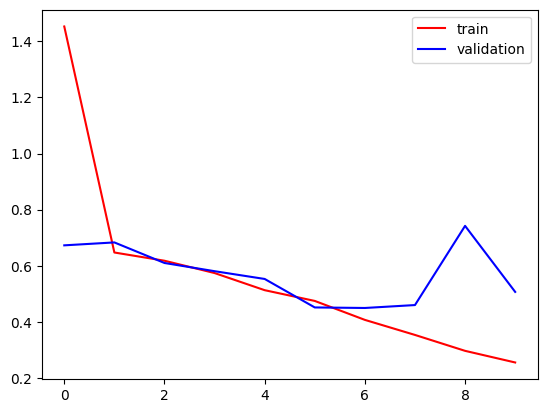

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [24]:
test_img=cv2.imread('/content/download (1).jpg')

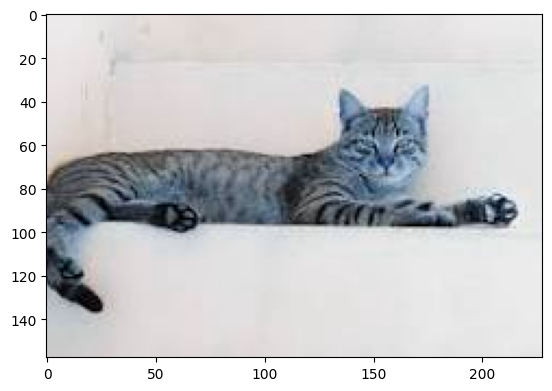

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(158, 228, 3)

In [28]:
test_img=cv2.resize(test_img,(256,256))

In [29]:
test_input=test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 284ms/step


array([[0.]], dtype=float32)